In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline

import matplotlib.animation as animation
import matplotlib.patheffects as path_effects
from mpl_toolkits.axes_grid1 import make_axes_locatable

import importlib
import sys
sys.path.append('/nethome/4302001/diffusion-hydro-mod/tools/')
import ACC_tools
importlib.reload(ACC_tools)
import pickle
%config InlineBackend.figure_format='retina'

In [3]:
trajdir = '/data/oceanparcels/output_data/data_Daan/project_diffusion/trelease/'

In [4]:
experiment_files = {
    "fine_advection" : "trelease_fine_locb_advection_None_K15000_p100000_dt40m.nc",
    "coarsened_tave_advection" : "trelease_coarsened_tave_locb_advection_None_K15000_p100000_dt40m.nc",
    "coarsened_tave_EM_Le_Sommer_C0.3" : "trelease_coarsened_tave_locb_EM_Le_Sommer_C0.3_p100000_dt40m.nc",
    "coarsened_tave_EM_Le_Sommer_C1" : "trelease_coarsened_tave_locb_EM_Le_Sommer_C1_p100000_dt40m.nc",
    "coarsened_tave_EM_Le_Sommer_C3" : "trelease_coarsened_tave_locb_EM_Le_Sommer_C3_p100000_dt40m.nc",
    "coarsened_tave_EM_Redi_smallslope_K1500" : "trelease_coarsened_tave_locb_EM_Redi_smallslope_K1500_p100000_dt40m.nc",
    "coarsened_tave_EM_Redi_smallslope_K5000" : "trelease_coarsened_tave_locb_EM_Redi_smallslope_K5000_p100000_dt40m.nc",
    "coarsened_tave_EM_Redi_smallslope_K15000" : "trelease_coarsened_tave_locb_EM_Redi_smallslope_K15000_p100000_dt40m.nc",
    "coarsened_tave_Markov1_K1500" : "trelease_coarsened_tave_locb_Markov1_K1500_Tl1728000_p100000_dt40m.nc",
    "coarsened_tave_Markov1_K5000" : "trelease_coarsened_tave_locb_Markov1_K5000_Tl1728000_p100000_dt40m.nc",
    "coarsened_tave_Markov1_K15000" : "trelease_coarsened_tave_locb_Markov1_K15000_Tl1728000_p100000_dt40m.nc",
    "coarse_advection" : "trelease_coarse_locb_advection_None_K15000_p100000_dt40m.nc",
    "coarse_EM_Le_Sommer_C0.3": "trelease_coarse_locb_EM_Le_Sommer_C0.3_p100000_dt40m.nc",
    "coarse_EM_Le_Sommer_C1":   "trelease_coarse_locb_EM_Le_Sommer_C1_p100000_dt40m.nc",
    "coarse_EM_Le_Sommer_C3":   "trelease_coarse_locb_EM_Le_Sommer_C3_p100000_dt40m.nc",
    "coarse_EM_Redi_smallslope_K1500": "trelease_coarse_locb_EM_Redi_smallslope_K1500_p100000_dt40m.nc",
    "coarse_EM_Redi_smallslope_K5000": "trelease_coarse_locb_EM_Redi_smallslope_K5000_p100000_dt40m.nc",
    "coarse_EM_Redi_smallslope_K15000": "trelease_coarse_locb_EM_Redi_smallslope_K15000_p100000_dt40m.nc",
    "coarse_M1_Redi_smallslope_K1500": "trelease_coarse_locb_M1_Redi_smallslope_K1500_p100000_dt40m.nc",
    "coarse_M1_Redi_smallslope_K5000": "trelease_coarse_locb_M1_Redi_smallslope_K5000_p100000_dt40m.nc",
    "coarse_M1_Redi_smallslope_K15000": "trelease_coarse_locb_M1_Redi_smallslope_K15000_p100000_dt40m.nc",
    "coarse_Markov1_K1500": "trelease_coarse_locb_Markov1_K1500_Tl1728000_p100000_dt40m.nc",
    "coarse_Markov1_K5000": "trelease_coarse_locb_Markov1_K5000_Tl1728000_p100000_dt40m.nc",
    "coarse_Markov1_K15000": "trelease_coarse_locb_Markov1_K15000_Tl1728000_p100000_dt40m.nc",
}

In [5]:
experiments = dict()
for experiment, filename in experiment_files.items():
    experiments[experiment] = xr.open_dataset(trajdir + str(filename), decode_times=False)

In [6]:
ds_field_fine = xr.open_dataset('/data/oceanparcels/input_data/MITgcm/ACC_channel/ACC_ridge_fine_1y_locb.nc')
ds_field_coarsened = xr.open_dataset("/data/oceanparcels/input_data/MITgcm/ACC_channel/ACC_ridge_fine_1y_locb_coarsened_tave_fixtemp.nc")
ds_field_coarse = xr.open_dataset('/data/oceanparcels/input_data/MITgcm/ACC_channel/ACC_ridge_coarse_1y_locb_with_derivative.nc')

## Evolution of tracer
### Coarsened

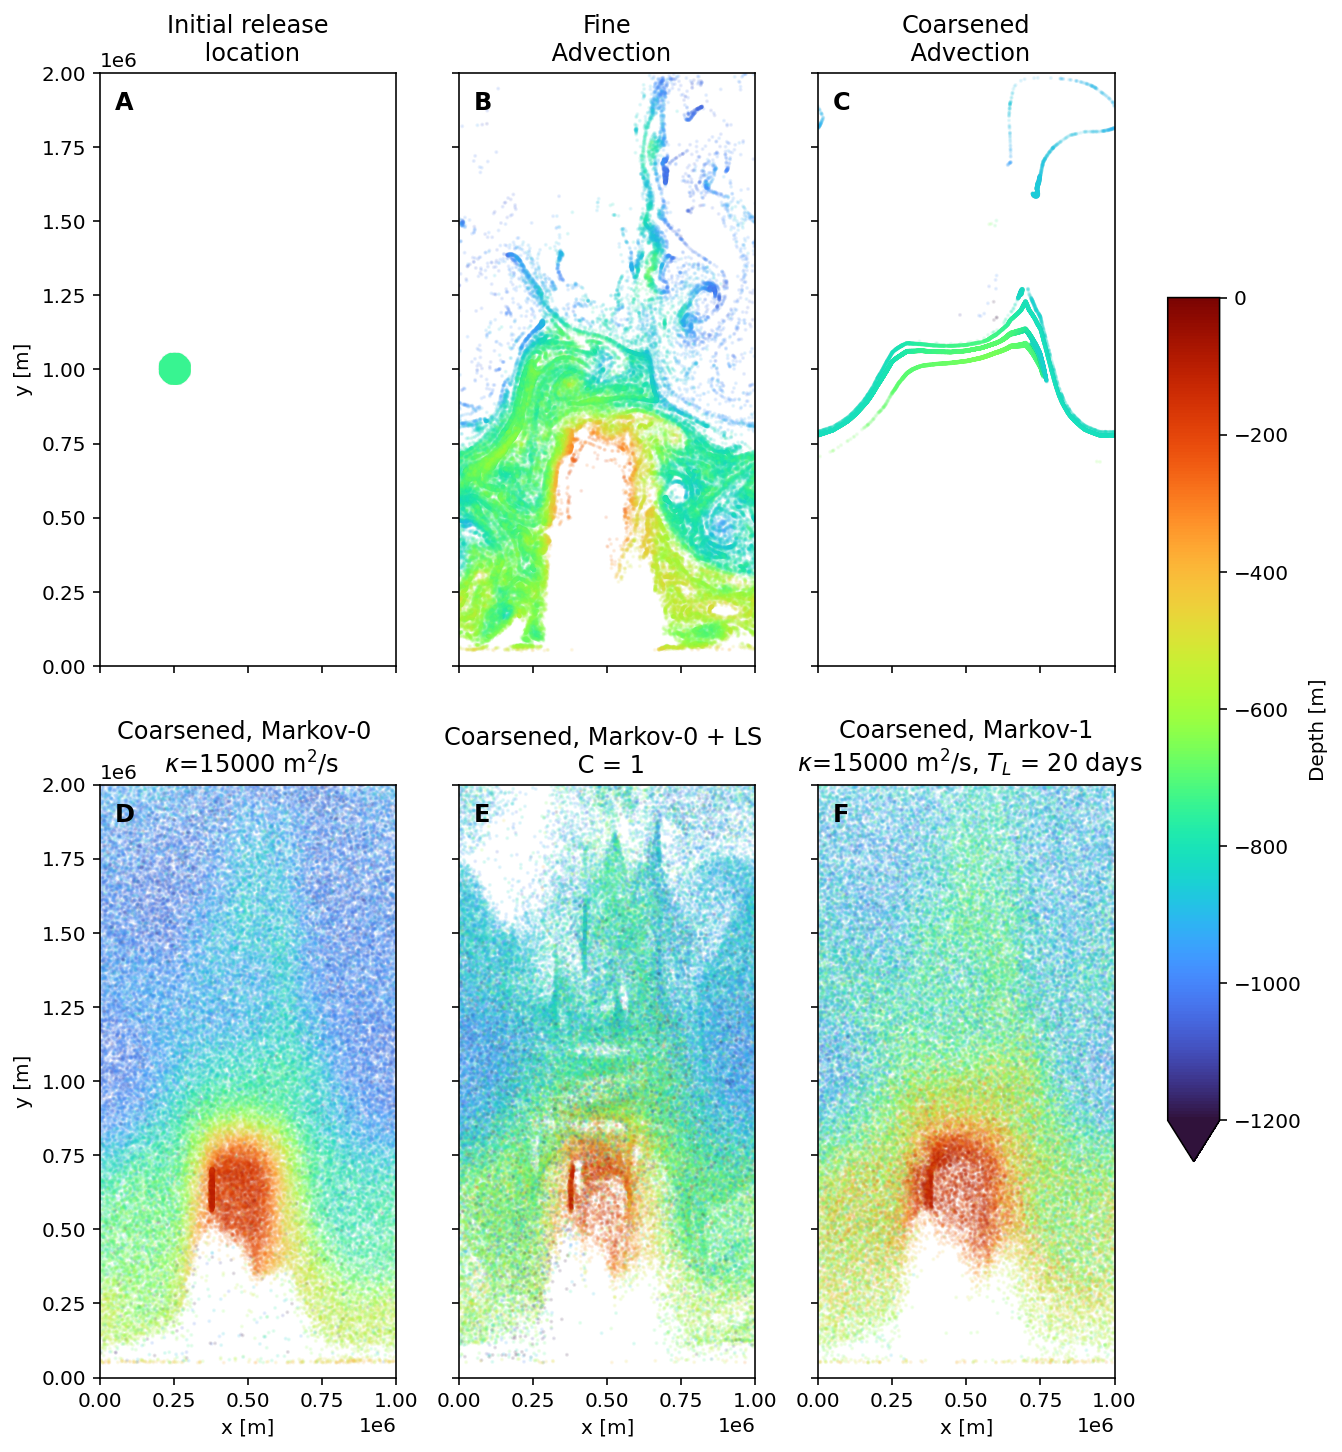

CPU times: user 36.1 s, sys: 3.67 s, total: 39.8 s
Wall time: 1min 4s


In [7]:
%%time
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(9,12))
ds = experiments["coarse_advection"]
step = 0
lowerbound = -2000
# upperbound = -500
ax[0,0].scatter(ds.isel(obs=step).lon, 
                ds.isel(obs=step).lat, 
                c = ds.isel(obs=step).z,
                vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[0,0].set_title("Initial release\n location")
ax[0,0].text(0.05, 0.97, 'A', va='top', fontsize='large', weight='heavy', transform = ax[0,0].transAxes)

step=180
ds = experiments["fine_advection"]
mxldepth = ds_field_coarsened.MXLDEPTH.interp(XC=ds.isel(obs=step).lon, 
                                              YC=ds.isel(obs=step).lat,
                                              method='linear',
                                              kwargs = {"fill_value":None})
ax[0,1].scatter(ds.isel(obs=step).lon.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                ds.isel(obs=step).lat.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                c = ds.isel(obs=step).z.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound),
                vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[0,1].set_title("Fine\n Advection")
ax[0,1].text(0.05, 0.97, 'B', va='top', fontsize='large', weight='heavy', transform = ax[0,1].transAxes)

ds = experiments["coarsened_tave_advection"]
mxldepth = ds_field_coarsened.MXLDEPTH.interp(XC=ds.isel(obs=step).lon, 
                                              YC=ds.isel(obs=step).lat,
                                              method='linear',
                                              kwargs = {"fill_value":None})
ax[0,2].scatter(ds.isel(obs=step).lon.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                ds.isel(obs=step).lat.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                c = ds.isel(obs=step).z.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound),
                vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[0,2].set_title("Coarsened\n Advection")
ax[0,2].text(0.05, 0.97, 'C', va='top', fontsize='large', weight='heavy', transform = ax[0,2].transAxes)

ds = experiments["coarsened_tave_EM_Redi_smallslope_K15000"]
mxldepth = ds_field_coarsened.MXLDEPTH.interp(XC=ds.isel(obs=step).lon, 
                                              YC=ds.isel(obs=step).lat,
                                              method='linear',
                                              kwargs = {"fill_value":None})
ax[1,0].scatter(ds.isel(obs=step).lon.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                ds.isel(obs=step).lat.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                c = ds.isel(obs=step).z.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound),
                vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[1,0].set_title("Coarsened, Markov-0 \n "+r"$\kappa$=15000 m$^2$/s")
ax[1,0].text(0.05, 0.97, 'D', va='top', fontsize='large', weight='heavy', transform = ax[1,0].transAxes)

ds = experiments["coarsened_tave_EM_Le_Sommer_C1"]
mxldepth = ds_field_coarsened.MXLDEPTH.interp(XC=ds.isel(obs=step).lon, 
                                              YC=ds.isel(obs=step).lat,
                                              method='linear',
                                              kwargs = {"fill_value":None})
ax[1,1].scatter(ds.isel(obs=step).lon.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                ds.isel(obs=step).lat.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                c = ds.isel(obs=step).z.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound),
                vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[1,1].set_title("Coarsened, Markov-0 + LS \n "+r"C = 1")
ax[1,1].text(0.05, 0.97, 'E', va='top', fontsize='large', weight='heavy', transform = ax[1,1].transAxes)

ds = experiments["coarsened_tave_Markov1_K15000"]
mxldepth = ds_field_coarsened.MXLDEPTH.interp(XC=ds.isel(obs=step).lon, 
                                              YC=ds.isel(obs=step).lat,
                                              method='linear',
                                              kwargs = {"fill_value":None})
img = ax[1,2].scatter(ds.isel(obs=step).lon.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                      ds.isel(obs=step).lat.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                      c = ds.isel(obs=step).z.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound),
                      vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[1,2].set_title("Coarsened, Markov-1\n "+r"$\kappa$=15000 m$^2$/s, $T_L$ = 20 days")
ax[1,2].text(0.05, 0.97, 'F', va='top', fontsize='large', weight='heavy', transform = ax[1,2].transAxes)

for i in range(2):
    for j in range(3):
        ax[i,j].set_xlim(0, 1e6)
        ax[i,j].set_ylim(0, 2e6)
        ax[i,j].set_aspect(1)
        if j > 0:
            ax[i,j].set_yticklabels([])
        else:
            ax[i,j].set_ylabel("y [m]")
        if i < 1:
            ax[i,j].set_xticklabels([])
        else:
            ax[i,j].set_xlabel("x [m]")
            
# cax,kw = mpl.colorbar.make_axes([axis for axis in ax.flat])
plt.subplots_adjust(right=0.91)
cax = plt.axes([0.95, 0.25, 0.04, 0.5])
# plt.colorbar(cax=cax)
cbar = plt.colorbar(img, cax=cax, shrink=0.5, extend='min', label='Depth [m]')
cbar.set_alpha(1)
cbar.draw_all()

# plt.tight_layout()

plt.savefig("viz/tracer_advection_coarsened_column.png", dpi=600, bbox_inches='tight')
plt.show()

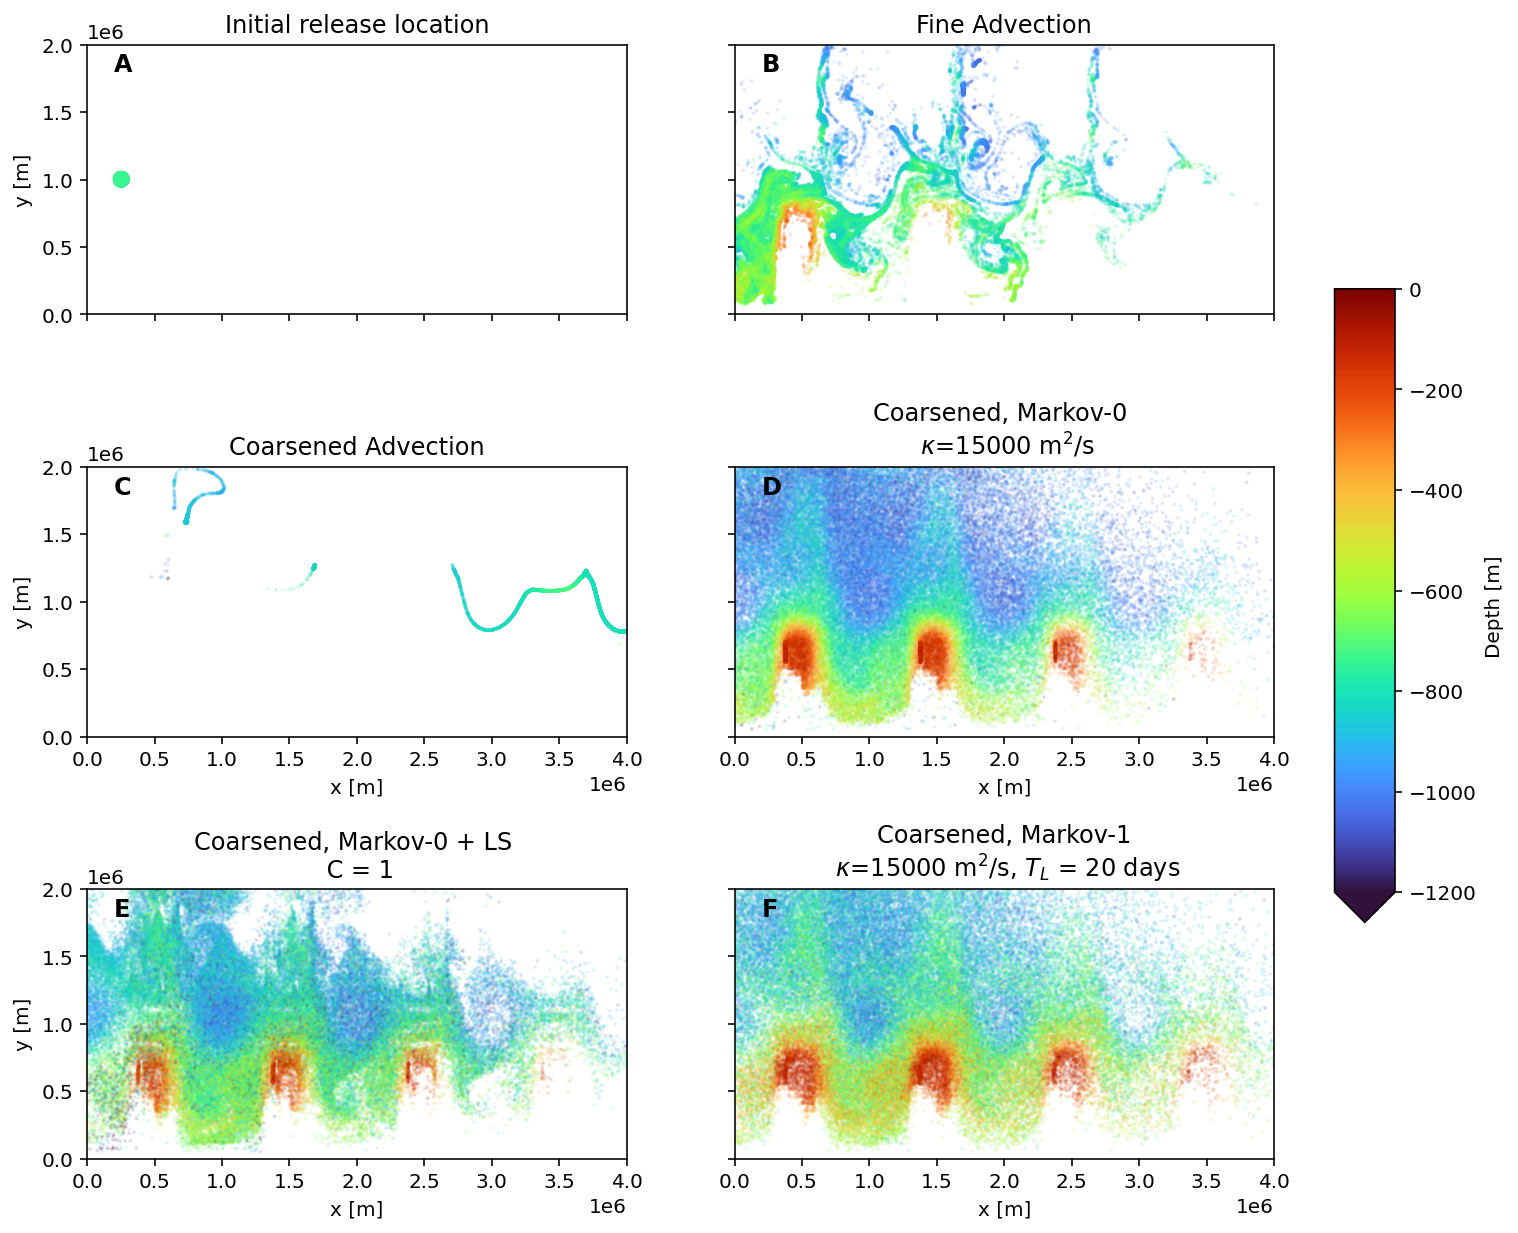

CPU times: user 31.5 s, sys: 2.27 s, total: 33.8 s
Wall time: 37.5 s


In [8]:
%%time

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10.5,11))
ds = experiments["coarse_advection"]
step = 0
lowerbound = -2000
upperbound = -500
ax[0,0].scatter(ds.isel(obs=step).lon, 
                ds.isel(obs=step).lat, 
                c = ds.isel(obs=step).z,
                vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[0,0].set_title("Initial release location")
ax[0,0].text(0.05, 0.97, 'A', va='top', fontsize='large', weight='heavy', transform = ax[0,0].transAxes)

step=180
ds = experiments["fine_advection"]
mxldepth = ds_field_coarsened.MXLDEPTH.interp(XC=ds.isel(obs=step).lon, 
                                              YC=ds.isel(obs=step).lat,
                                              method='nearest',
                                              kwargs={"fill_value":None})
ax[0,1].scatter((ds.isel(obs=step).lon + ds.isel(obs=step).lon_adjustment).where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                ds.isel(obs=step).lat.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                c = ds.isel(obs=step).z.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound),
                vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[0,1].set_title("Fine Advection")
ax[0,1].text(0.05, 0.97, 'B', va='top', fontsize='large', weight='heavy', transform = ax[0,1].transAxes)

ds = experiments["coarsened_tave_advection"]
mxldepth = ds_field_coarsened.MXLDEPTH.interp(XC=ds.isel(obs=step).lon, 
                                              YC=ds.isel(obs=step).lat,
                                              method='nearest',
                                              kwargs={"fill_value":None})
ax[1,0].scatter((ds.isel(obs=step).lon + ds.isel(obs=step).lon_adjustment).where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                ds.isel(obs=step).lat.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                c = ds.isel(obs=step).z.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound),
                vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[1,0].set_title("Coarsened Advection")
ax[1,0].text(0.05, 0.97, 'C', va='top', fontsize='large', weight='heavy', transform = ax[1,0].transAxes)

ds = experiments["coarsened_tave_EM_Redi_smallslope_K15000"]
mxldepth = ds_field_coarsened.MXLDEPTH.interp(XC=ds.isel(obs=step).lon, 
                                              YC=ds.isel(obs=step).lat,
                                              method='nearest',
                                              kwargs={"fill_value":None})
ax[1,1].scatter((ds.isel(obs=step).lon + ds.isel(obs=step).lon_adjustment).where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                ds.isel(obs=step).lat.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                c = ds.isel(obs=step).z.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound),
                vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[1,1].set_title("Coarsened, Markov-0 \n "+r"$\kappa$=15000 m$^2$/s")
ax[1,1].text(0.05, 0.97, 'D', va='top', fontsize='large', weight='heavy', transform = ax[1,1].transAxes)

ds = experiments["coarsened_tave_EM_Le_Sommer_C1"]
mxldepth = ds_field_coarsened.MXLDEPTH.interp(XC=ds.isel(obs=step).lon, 
                                              YC=ds.isel(obs=step).lat,
                                              method='nearest',
                                              kwargs={"fill_value":None})
ax[2,0].scatter((ds.isel(obs=step).lon + ds.isel(obs=step).lon_adjustment).where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                ds.isel(obs=step).lat.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                c = ds.isel(obs=step).z.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound),
                vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[2,0].set_title("Coarsened, Markov-0 + LS \n "+r"C = 1")
ax[2,0].text(0.05, 0.97, 'E', va='top', fontsize='large', weight='heavy', transform = ax[2,0].transAxes)

ds = experiments["coarsened_tave_Markov1_K15000"]
mxldepth = ds_field_coarsened.MXLDEPTH.interp(XC=ds.isel(obs=step).lon, 
                                              YC=ds.isel(obs=step).lat,
                                              method='nearest',
                                              kwargs={"fill_value":None})
img = ax[2,1].scatter((ds.isel(obs=step).lon + ds.isel(obs=step).lon_adjustment).where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                      ds.isel(obs=step).lat.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                      c = ds.isel(obs=step).z.where(ds.isel(obs=step).z < -mxldepth).where(ds.isel(obs=step).z > lowerbound),
                      vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[2,1].set_title("Coarsened, Markov-1\n "+r"$\kappa$=15000 m$^2$/s, $T_L$ = 20 days")
ax[2,1].text(0.05, 0.97, 'F', va='top', fontsize='large', weight='heavy', transform = ax[2,1].transAxes)

for i in range(3):
    for j in range(2):
        ax[i,j].set_xlim(0, 4e6)
        ax[i,j].set_ylim(0, 2e6)
        ax[i,j].set_aspect(1)
        if j > 0:
            ax[i,j].set_yticklabels([])
        else:
            ax[i,j].set_ylabel("y [m]")
        if i < 1:
            ax[i,j].set_xticklabels([])
        else:
            ax[i,j].set_xlabel("x [m]")
            
# cax,kw = mpl.colorbar.make_axes([axis for axis in ax.flat])
plt.subplots_adjust(right=0.91)
cax = plt.axes([0.95, 0.3, 0.04, 0.4])
# plt.colorbar(cax=cax)
cbar = plt.colorbar(img, cax=cax, shrink=0.4, extend='min', label='Depth [m]')
cbar.set_alpha(1)
cbar.draw_all()

# plt.tight_layout()

plt.savefig("viz/tracer_advection_coarsened_column_continuous.png", dpi=600, bbox_inches='tight')
plt.show()

### Coarse

CPU times: user 18.6 s, sys: 2.31 s, total: 20.9 s
Wall time: 33.8 s


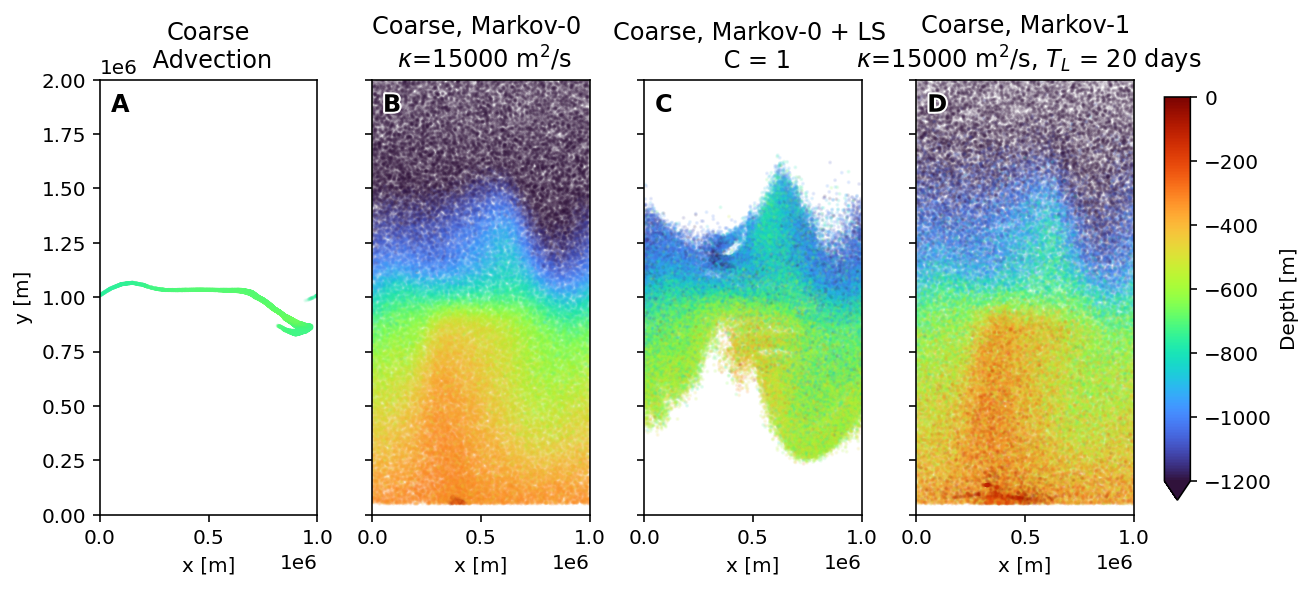

In [9]:
%%time 

fig, ax = plt.subplots(ncols=4, figsize=(9,4))
step=180

lowerbound = -2000
upperbound = -100

ds = experiments["coarse_advection"]
mxldepth = ds_field_coarse.MXLDEPTH.isel(time=step).interp(XC=ds.isel(obs=step).lon, 
                                           YC=ds.isel(obs=step).lat,
                                           method='linear',
                                           kwargs = {"fill_value":None})
ax[0].scatter(ds.isel(obs=step).lon.where(ds.isel(obs=step).z < mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                ds.isel(obs=step).lat.where(ds.isel(obs=step).z < mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                c = ds.isel(obs=step).z.where(ds.isel(obs=step).z < mxldepth).where(ds.isel(obs=step).z > lowerbound),
                vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[0].set_title("Coarse\n Advection")
ax[0].text(0.05, 0.97, 'A', va='top', fontsize='large', weight='heavy', transform = ax[0].transAxes)

ds = experiments["coarse_EM_Redi_smallslope_K15000"]
mxldepth = ds_field_coarse.MXLDEPTH.isel(time=step).interp(XC=ds.isel(obs=step).lon, 
                                           YC=ds.isel(obs=step).lat,
                                           method='linear',
                                           kwargs = {"fill_value":None})
ax[1].scatter(ds.isel(obs=step).lon.where(ds.isel(obs=step).z < mxldepth).where(ds.isel(obs=step).z > lowerbound), 
              ds.isel(obs=step).lat.where(ds.isel(obs=step).z < mxldepth).where(ds.isel(obs=step).z > lowerbound), 
              c = ds.isel(obs=step).z.where(ds.isel(obs=step).z < mxldepth).where(ds.isel(obs=step).z > lowerbound),
              vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[1].set_title("Coarse, Markov-0 \n "+r"$\kappa$=15000 m$^2$/s")
B_label = ax[1].text(0.05, 0.97, 'B', va='top', fontsize='large', weight='heavy', transform = ax[1].transAxes)
B_label.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                       path_effects.Normal()])

ds = experiments["coarse_EM_Le_Sommer_C1"]
mxldepth = ds_field_coarse.MXLDEPTH.isel(time=step).interp(XC=ds.isel(obs=step).lon, 
                                           YC=ds.isel(obs=step).lat,
                                           method='linear',
                                           kwargs = {"fill_value":None})
ax[2].scatter(ds.isel(obs=step).lon.where((ds.isel(obs=step).z < mxldepth) & (ds.isel(obs=step).z > lowerbound)), 
              ds.isel(obs=step).lat.where((ds.isel(obs=step).z < mxldepth) & (ds.isel(obs=step).z > lowerbound)), 
              c = ds.isel(obs=step).z.where((ds.isel(obs=step).z < mxldepth) & (ds.isel(obs=step).z > lowerbound)),
              vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[2].set_title("Coarse, Markov-0 + LS \n "+r"C = 1")
ax[2].text(0.05, 0.97, 'C', va='top', fontsize='large', weight='heavy', transform = ax[2].transAxes)

ds = experiments["coarse_Markov1_K15000"]
mxldepth = ds_field_coarse.MXLDEPTH.isel(time=step).interp(XC=ds.isel(obs=step).lon, 
                                           YC=ds.isel(obs=step).lat,
                                           method='linear',
                                           kwargs = {"fill_value":None})
img = ax[3].scatter(ds.isel(obs=step).lon.where((ds.isel(obs=step).z < mxldepth) & (ds.isel(obs=step).z > lowerbound)), 
                    ds.isel(obs=step).lat.where((ds.isel(obs=step).z < mxldepth) & (ds.isel(obs=step).z > lowerbound)), 
                    c = ds.isel(obs=step).z.where((ds.isel(obs=step).z < mxldepth) & (ds.isel(obs=step).z > lowerbound)),
                    vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[3].set_title("Coarse, Markov-1\n "+r"$\kappa$=15000 m$^2$/s, $T_L$ = 20 days")
D_label = ax[3].text(0.05, 0.97, 'D', va='top', fontsize='large', weight='heavy', transform = ax[3].transAxes)
D_label.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                       path_effects.Normal()])

for i in range(4):
        ax[i].set_xlim(0, 1e6)
        ax[i].set_ylim(0, 2e6)
        ax[i].set_aspect(1)
        if i > 0:
            ax[i].set_yticklabels([])
        else:
            ax[i].set_ylabel("y [m]")
        ax[i].set_xlabel("x [m]")

plt.subplots_adjust(right=0.93)
cax = plt.axes([0.95, 0.15, 0.02, 0.7])
cbar = plt.colorbar(img, cax=cax, shrink=0.5, extend='min', label='Depth [m]')
cbar.set_alpha(1)
cbar.draw_all()
plt.savefig("viz/tracer_advection_coarse_column.png", dpi=600, bbox_inches='tight')

CPU times: user 17.8 s, sys: 2.18 s, total: 20 s
Wall time: 22.5 s


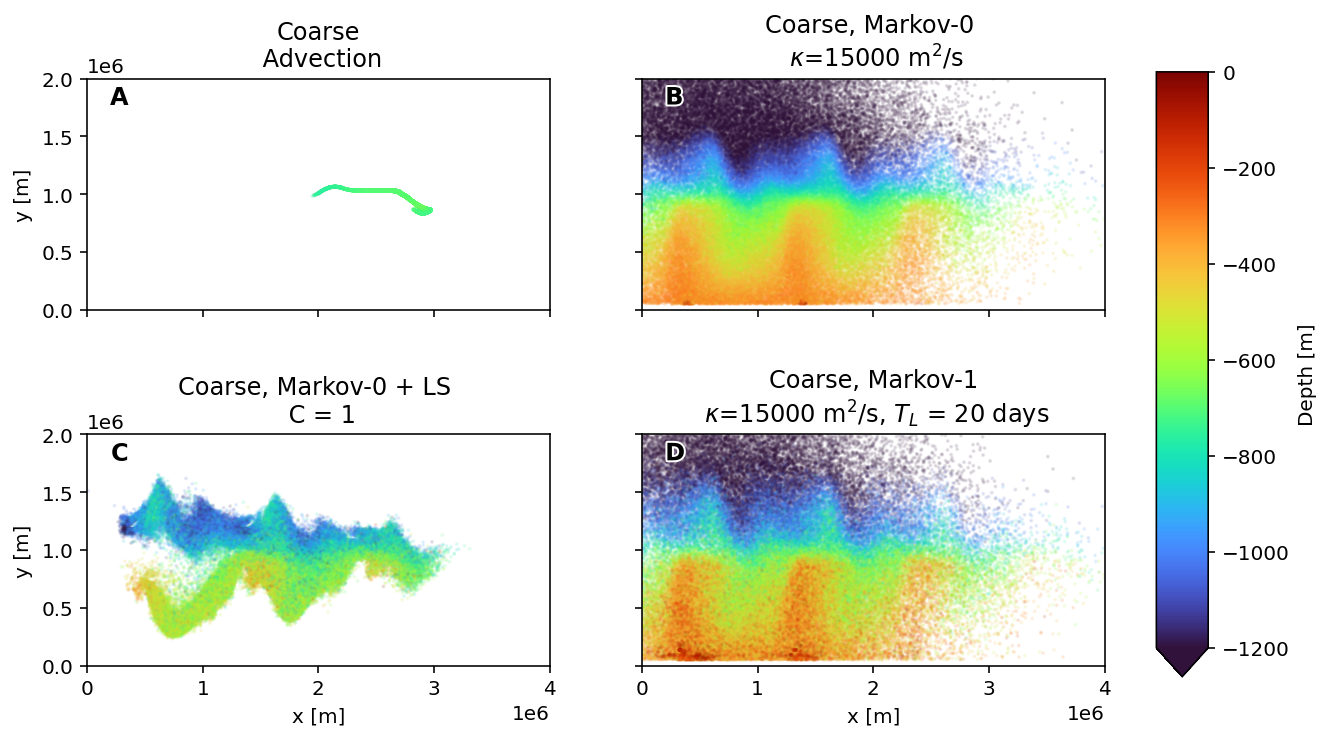

In [10]:
%%time 

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(9,6))
step=180

lowerbound = -2000
upperbound = -100

ds = experiments["coarse_advection"]
mxldepth = ds_field_coarse.MXLDEPTH.isel(time=step).interp(XC=ds.isel(obs=step).lon, 
                                           YC=ds.isel(obs=step).lat,
                                           method='linear',
                                           kwargs = {"fill_value":None})
ax[0,0].scatter((ds.lon + ds.lon_adjustment).isel(obs=step).where((ds.isel(obs=step).z < mxldepth) & (ds.isel(obs=step).z > lowerbound)), 
                ds.isel(obs=step).lat.where(ds.isel(obs=step).z < mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                c = ds.isel(obs=step).z.where(ds.isel(obs=step).z < mxldepth).where(ds.isel(obs=step).z > lowerbound),
                vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[0,0].set_title("Coarse\n Advection")
ax[0,0].text(0.05, 0.97, 'A', va='top', fontsize='large', weight='heavy', transform = ax[0,0].transAxes)

ds = experiments["coarse_EM_Redi_smallslope_K15000"]
mxldepth = ds_field_coarse.MXLDEPTH.isel(time=step).interp(XC=ds.isel(obs=step).lon, 
                                           YC=ds.isel(obs=step).lat,
                                           method='linear',
                                           kwargs = {"fill_value":None})
ax[0,1].scatter((ds.lon + ds.lon_adjustment).isel(obs=step).where((ds.isel(obs=step).z < mxldepth) & (ds.isel(obs=step).z > lowerbound)), 
                ds.isel(obs=step).lat.where(ds.isel(obs=step).z < mxldepth).where(ds.isel(obs=step).z > lowerbound), 
                c = ds.isel(obs=step).z.where(ds.isel(obs=step).z < mxldepth).where(ds.isel(obs=step).z > lowerbound),
                vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[0,1].set_title("Coarse, Markov-0 \n "+r"$\kappa$=15000 m$^2$/s")
B_label = ax[0,1].text(0.05, 0.97, 'B', va='top', fontsize='large', weight='heavy', transform = ax[0,1].transAxes)
B_label.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                       path_effects.Normal()])

ds = experiments["coarse_EM_Le_Sommer_C1"]
mxldepth = ds_field_coarse.MXLDEPTH.isel(time=step).interp(XC=ds.isel(obs=step).lon, 
                                           YC=ds.isel(obs=step).lat,
                                           method='linear',
                                           kwargs = {"fill_value":None})
ax[1,0].scatter((ds.lon + ds.lon_adjustment).isel(obs=step).where((ds.isel(obs=step).z < mxldepth) & (ds.isel(obs=step).z > lowerbound)), 
                ds.isel(obs=step).lat.where((ds.isel(obs=step).z < mxldepth) & (ds.isel(obs=step).z > lowerbound)), 
                c = ds.isel(obs=step).z.where((ds.isel(obs=step).z < mxldepth) & (ds.isel(obs=step).z > lowerbound)),
                vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[1,0].set_title("Coarse, Markov-0 + LS \n "+r"C = 1")
ax[1,0].text(0.05, 0.97, 'C', va='top', fontsize='large', weight='heavy', transform = ax[1,0].transAxes)

ds = experiments["coarse_Markov1_K15000"]
mxldepth = ds_field_coarse.MXLDEPTH.isel(time=step).interp(XC=ds.isel(obs=step).lon, 
                                           YC=ds.isel(obs=step).lat,
                                           method='linear',
                                           kwargs = {"fill_value":None})
img = ax[1,1].scatter((ds.lon + ds.lon_adjustment).isel(obs=step).where((ds.isel(obs=step).z < mxldepth) & (ds.isel(obs=step).z > lowerbound)), 
                      ds.isel(obs=step).lat.where((ds.isel(obs=step).z < mxldepth) & (ds.isel(obs=step).z > lowerbound)), 
                      c = ds.isel(obs=step).z.where((ds.isel(obs=step).z < mxldepth) & (ds.isel(obs=step).z > lowerbound)),
                      vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
ax[1,1].set_title("Coarse, Markov-1\n "+r"$\kappa$=15000 m$^2$/s, $T_L$ = 20 days")
D_label = ax[1,1].text(0.05, 0.97, 'D', va='top', fontsize='large', weight='heavy', transform = ax[1,1].transAxes)
D_label.set_path_effects([path_effects.Stroke(linewidth=2, foreground='white'),
                       path_effects.Normal()])

for i in range(2):
    for j in range(2):
        ax[i,j].set_xlim(0, 4e6)
        ax[i,j].set_ylim(0, 2e6)
        ax[i,j].set_aspect(1)
        if j > 0:
            ax[i,j].set_yticklabels([])
        else:
            ax[i,j].set_ylabel("y [m]")
        if i < 1:
            ax[i,j].set_xticklabels([])
        else:
            ax[i,j].set_xlabel("x [m]")

# cax,kw = mpl.colorbar.make_axes([axis for axis in ax.flat])
plt.subplots_adjust(right=0.91)
cax = plt.axes([0.95, 0.15, 0.04, 0.7])
# plt.colorbar(cax=cax)
cbar = plt.colorbar(img, cax=cax, shrink=0.7, extend='min', label='Depth [m]')
cbar.set_alpha(1)
cbar.draw_all()

plt.savefig("viz/tracer_advection_coarse_continuous.png", dpi=600, bbox_inches='tight')